Version 2, edited by Clare on Feb 19, 2018 (9:34pm)

### Relationship between discrete and continuous fourier transform (1D)

Denote the wavenumber in longitude direction by $k$ and the space coordinate by $\lambda$. The continuous fourier transform and inverse fourier transform are:
$$ \hat{Z}(k) = \int^{2\pi}_0 Z(\lambda) e^{-ik\lambda} d\lambda$$
$$ Z(\lambda) = \frac{1}{2\pi}\int^{2\pi}_0 \hat{Z}(k) e^{ik\lambda} dk$$
Denote $N$ as the length that the data is sampled. The corresponding discrete fourier trasnsform pairs are
$$ \hat{Z}(k) = \sum_{n=0}^{N-1} Z(n) e^{-i\frac{2\pi kn}{N}} $$
$$ Z(\lambda) = \frac{1}{N} \sum_{k=0}^{N-1} \hat{Z}(k) e^{i\frac{2\pi kn}{N}} $$
where $\lambda$ is discretized as $\frac{2\pi n}{N}$ with $n$ being an integer.

### The fourier coefficients

Writing $Z(\lambda)$ as a fourier series,
$$Z(\lambda) = \sum_{k=0}^{k_\text{max}} (a_n\cos(k\lambda) + b_n\sin(k\lambda))$$
and substitute that into the equation of $\hat{Z}(k)$, we get
$$ \hat{Z}(k) = \frac{1}{2} a_n - i \frac{1}{2} b_n = \frac{1}{2} c_n$$
where $c_n = a_n + i b_n$. $c_n$ will be the output from the FFT.

### Loading modules for fast fourier transform (FFT) and inverse fast fourier transform (IFFT) from SciPy package

In [1]:
from scipy.fftpack import fft, ifft # Load fast fourier transform packages from scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

### An example of FFT and IFFT operation

As an illustration of how the SciPy FFT package is used, I'm creating set of evenly spaced discrete data points. There are totally $N=1000$ points sampled between the range 0 to $N$ (denoted by $x_i$ as follows). For simplicity, I use a consine function to generate the data points here. The $i$-th data point is given by:
$$ y_i = \cos \left(\frac{2\pi x_i}{N} \right)$$
where $lambda$ = \frac{2\pi x_i}{N}$ here.

In [2]:
N = 100 # spacing of data / resolution
x = np.arange(0,N)
y = np.cos(2*pi*x/N)

Let's plot the data and see how it looks like:

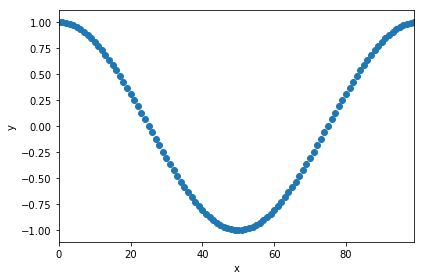

In [3]:
plt.scatter(x,y)
plt.xlim((x.min(),x.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Let's trying doing a discrete FFT on $y$.

In [4]:
cn = fft(y)

$c_n$ is the output from FFT, i.e. fourier coefficients defined above. Referring to the SciPy documentation (```y``` below is ```cn``` in this notebook):

> For N even, the elements y[1]...y[N/2−1] contain the positive-frequency terms, and the elements y[N/2]...y[N−1] contain the negative-frequency terms, in order of decreasingly negative frequency. For N odd, the elements y[1]...y[(N−1)/2] contain the positive- frequency terms, and the elements y[(N+1)/2]...y[N−1] contain the negative- frequency terms, in order of decreasingly negative frequency.

In the example I show here, $\cos \left(\frac{2\pi x_i}{N} \right)$ is an even function. I would expect the positive and negative frequency terms corresponding to the same frequency have the same magnitude. Let's check if that's the case.

In [5]:
T = 1./x.size
xf = np.hstack(( np.arange(0,N//2), np.arange(-N//2,0) ))

Confirm that $xf$ and $cn$ are of the same size:

In [6]:
print('xf.size=',xf.size)
print('cn.size=',cn.size)

xf.size= 100
cn.size= 100


Let's print out the coefficient and see how they look like:

In [7]:
print(cn[:10])

[ -2.33146835e-15 +0.00000000e+00j   5.00000000e+01 -6.80047730e-15j
   5.75160293e-16 -2.45929817e-15j   2.56533007e-15 -5.69044597e-16j
   1.17745885e-16 +2.78004314e-15j  -1.18692392e-15 -2.10361300e-15j
   2.95612411e-17 +1.16984114e-15j   1.08261127e-15 +2.82636527e-15j
  -1.03792696e-15 +7.06374423e-17j   5.55492036e-16 -1.20217872e-15j]


Since cos is an even function, the imaginary part of $c_n$ are zero. Only the real part of $c_1$ is non-vanishing (as expected). Let's plot $\|c_n\|$ in a bar graph, where $n \in [-10,10]$:

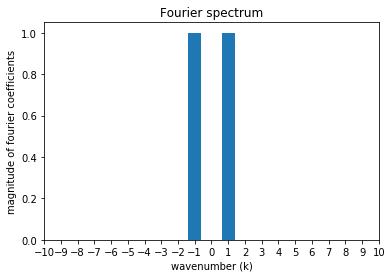

In [8]:
plt.bar(xf,2.0/x.size * np.abs(cn)) # Take the absolute value. 
# In this case, cosine is an even function, so this is equivalent to the real value.
plt.xticks(xf)
plt.xlim((-10,10))
plt.title('Fourier spectrum')
plt.xlabel('wavenumber (k)');
plt.ylabel('magnitude of fourier coefficients');
plt.show()

#### Inverse Fourier transform

To recover the series from the fourier coefficients, you can use the inverse fourier transform function (```ifft```) as demonstrated below.

/home/csyhuang/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


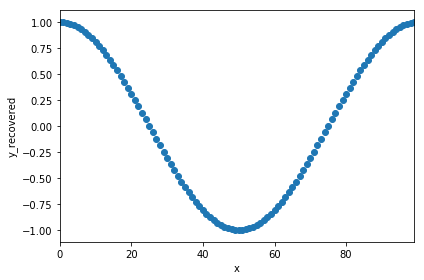

In [15]:
y_recovered = ifft(cn)

plt.scatter(x,y_recovered)
plt.xlim((x.min(),x.max()))
plt.xlabel('x')
plt.ylabel('y_recovered')
plt.tight_layout()
plt.show()

### Exercise for Claire

For each of the following functions, 
- describe how you would expect the fourier spectrum ($c_n$) to look like;
- use the results from FFT to confirm your answer; and lastly,
- recover the original time series using the fourier coefficients obtained from FFT, and plot it out.  

**Bonus question**: Can you initialize a array ```cn4``` such that IFFT would recover $\sin\lambda$?  
Hint: In python, ```j``` denotes the imaginary unit. If I want to construct $\cos\lambda$ from fourier coefficients ```cn_x```, I would initialize ```cn_x``` by:
```
cn_x = np.zeros((N),'complex')
cn_x[1] = 1.+0.j
cn_x[-1] = 1.+0.j
y_recovered = ifft(cn)
```

#### Question 1
$f(\lambda) = 1 + 2\cos \lambda - 3\sin \lambda$.  
How would the spectrum look like? Which coefficients $\|c_n\|$ are non-trivial? What are their expected values?  
(Double click to type in your answer, and then press Shift+return)

In [9]:
# Type your code here for Question 1
N1 = 100 # spacing of data / resolution
x1 = np.arange(0,N)
y1 = None # replace None with your code

# Write your code for fourier transform and plotting the graphs

#### Question 2
$f(\lambda) = \cos 2\lambda - 5\sin 3\lambda$.  
How would the spectrum look like? Which coefficients $\|c_n\|$ are non-trivial? What are their expected values?   
(Double click to type in your answer, and then press Shift+return)

In [10]:
# Type your code here for Question 2


#### Question 3
$f(\lambda) = 1 + 2\cos \lambda - 3\sin \lambda$.  
How would the spectrum look like? For Question 3, it is good enough to give qualitative description.  
(Double click to type in your answer, and then press Shift+return)

In [11]:
# Type your code here for Question 3


**Bonus question**: Can you initialize a array ```cn4``` such that IFFT would recover $\sin\lambda$?  
Hint: If I want to construct $\cos\lambda$ from fourier coefficients ```cn_x```, I would initialize ```cn_x``` by:
```
cn_x = np.zeros((N),'complex')
cn_x[1] = 1.+0.j
cn_x[-1] = 1.+0.j
y_recovered = ifft(cn)
```

In [ ]:
# Type your code here for the bonus question
